In [415]:
# Importnado bibliotecas e módulos necessários

import pandas as pd # Pandas para manipulação de dataframes
from dfply import * # Importação dos módulos necessário para trabalhar com pipe em Python
import numpy as np # Operações matemáticas
import matplotlib.dates as mdates # Arrumar as datas no eixo

# Visualização dos dados
import seaborn as sns 
import matplotlib.pyplot as plt
# Evitar ficar usando plt.show()
%matplotlib inline

In [416]:
df_teste = pd.read_csv('https://raw.githubusercontent.com/FlavioMacaubas/covid_19_paraiba/master/base_dados.csv')

In [417]:
paraiba = df_teste.loc[df_teste['cidade'] == 'Paraíba']
paraiba.tail()

,data,cidade,confirmados,obitos,recuperados,novos_casos,novos_obitos
23223,2020-08-23,Paraíba,101132,2308,62674,162,20
23447,2020-08-24,Paraíba,101303,2330,63037,171,22
23671,2020-08-25,Paraíba,102208,2350,64944,905,20
23895,2020-08-26,Paraíba,103213,2371,68072,1005,21
24119,2020-08-27,Paraíba,104096,2388,71109,883,17


In [418]:
# Configurações globais
sns.set_style('darkgrid') # background
sns.set_context('paper') # Formato artigo
plt.tight_layout()
# Parametros e rcParams vai setar configurações globais para os gráficos, ela serve também como mecanismo de controle
parametros = {'legend.fontsize': 13,
          'figure.figsize': (15,7)} #15,7
plt.rcParams.update(parametros)

<Figure size 432x288 with 0 Axes>

## Confirmados, Óbitos e Recuperados

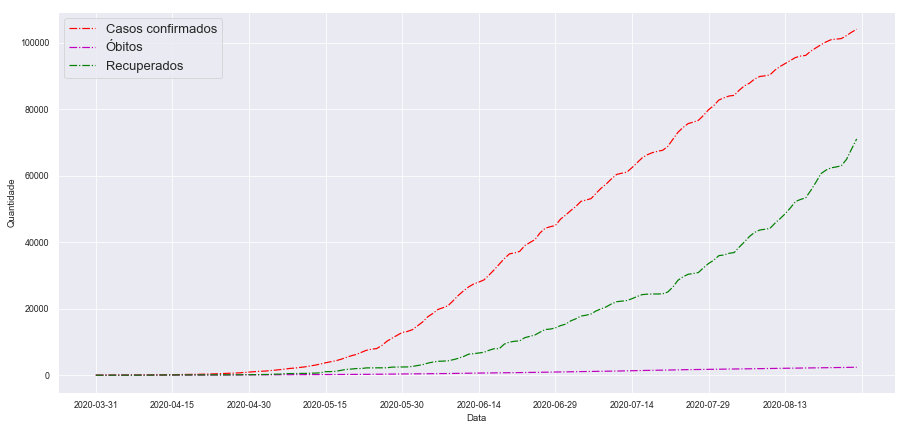

In [419]:
# Mapa confirmados e novos casos
data = mdates.num2date(mdates.datestr2num(paraiba['data']))
fig, ax = plt.subplots()
ax.plot(paraiba['data'], paraiba['confirmados'], 'r-.', label = 'Casos confirmados')
ax.plot(paraiba['data'],paraiba['obitos'], 'm-.', label = 'Óbitos') 
ax.plot(paraiba['data'],paraiba['recuperados'], 'g-.', label = 'Recuperados') 
ax.set_xlabel('Data') # Nome do eixo x
ax.set_ylabel('Quantidade') # Nome do eixo y
ax.xaxis.set_major_locator(plt.MaxNLocator(15)) # Define quantidad de label
ax.legend(loc = 'upper left')
plt.savefig('confirmados_pb.png')

## Novos confirmados, novos recuperados e novos óbitos

In [420]:
# Criando novos recuperados
paraiba['novos_recuperados'] = paraiba['recuperados'] - paraiba['recuperados'].shift(1)
paraiba = paraiba[paraiba['novos_recuperados'].notna()]
paraiba.tail()

C:\Users\Macaubas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,data,cidade,confirmados,obitos,recuperados,novos_casos,novos_obitos,novos_recuperados
23223,2020-08-23,Paraíba,101132,2308,62674,162,20,265.0
23447,2020-08-24,Paraíba,101303,2330,63037,171,22,363.0
23671,2020-08-25,Paraíba,102208,2350,64944,905,20,1907.0
23895,2020-08-26,Paraíba,103213,2371,68072,1005,21,3128.0
24119,2020-08-27,Paraíba,104096,2388,71109,883,17,3037.0


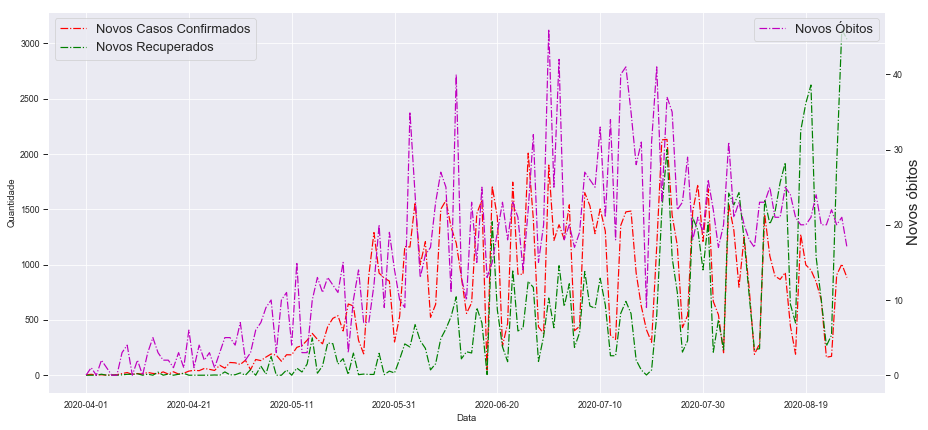

In [421]:
# Mapa confirmados e novos casos
#data = mdates.num2date(mdates.datestr2num(paraiba['data']))
fig, ax = plt.subplots()
ax.plot(paraiba['data'], paraiba['novos_casos'], 'r-.', label = 'Novos Casos Confirmados')
ax.plot(paraiba['data'],paraiba['novos_recuperados'], 'g-.', label = 'Novos Recuperados') 
ax.set_xlabel('Data') # Nome do eixo x
ax.set_ylabel('Quantidade') # Nome do eixo y
ax.xaxis.set_major_locator(plt.MaxNLocator(10)) # Define quantidad de label

ax1 = ax.twinx()

ax1.plot(paraiba['data'],paraiba['novos_obitos'], 'm-.', label = 'Novos Óbitos') 
ax1.xaxis.set_major_locator(plt.MaxNLocator(10)) # Define quantidad de label
ax1.set_ylabel('Novos óbitos', fontsize = 15) # Nome do eixo x
ax1.grid(False)


ax.legend(loc = 'upper left')
ax1.legend(loc = 'upper right')

plt.savefig('novos_pb.png')

# Gráfico por variação

In [422]:
# Criando as variações
pb =(
        paraiba  >> mutate(var_conf = (X.confirmados - X.confirmados.shift(1)) * 100 / X.confirmados.shift(1)) 
        >> mutate(var_obi = (X.obitos - X.obitos.shift(1)) * 100 / X.obitos.shift(1)) 
        >> mutate(var_rec = (X.recuperados - X.recuperados.shift(1)) * 100 / X.recuperados.shift(1)) 
        >> select(X.data, X.var_conf, X.var_obi, X.var_rec)
    )

pb = pb.dropna(how = 'any') # Tira valores ausentes
pb = pb >> mask( X.var_rec != np.inf) # Tira infinito
pb.head()

,data,var_conf,var_obi,var_rec
44,2020-04-05,2.941176,33.333333,0.000000
53,2020-04-06,2.857143,0.000000,22.222222
63,2020-04-07,13.888889,0.000000,0.000000
74,2020-04-08,34.146341,75.000000,27.272727
85,2020-04-09,43.636364,57.142857,57.142857


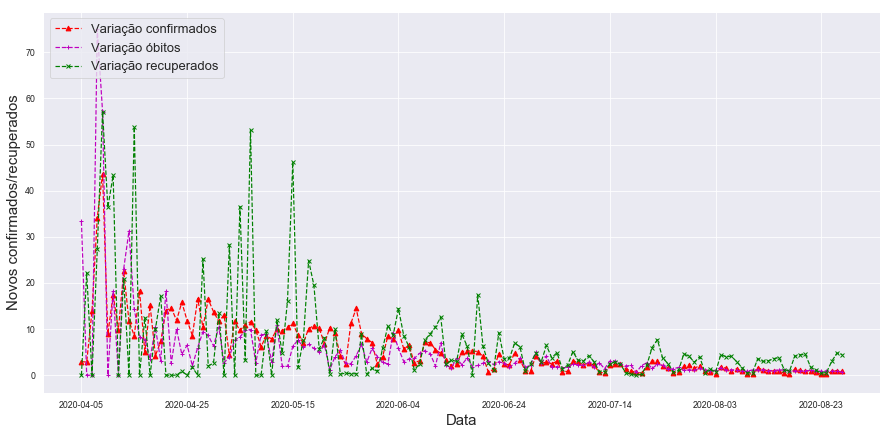

In [423]:
# Mapa confirmados e novos acumulados

fig, ax = plt.subplots()
ax.plot(pb['data'], pb['var_conf'], 'r--^', label = 'Variação confirmados')
ax.plot(pb['data'],pb['var_obi'], 'm--+', label = 'Variação óbitos') 
ax.plot(pb['data'],pb['var_rec'], 'g--x', label = 'Variação recuperados') 
ax.set_xlabel('Data', fontsize = 15) # Nome do eixo x
ax.set_ylabel('Novos confirmados/recuperados', fontsize = 15) # Nome do eixo y
ax.xaxis.set_major_locator(plt.MaxNLocator(10)) # Define quantidad de label

ax.legend(loc = 'upper left')
plt.savefig('variacoes.png')

# Média móvel

## Novos casos

In [424]:
media_movel = (paraiba
               >> mutate(mm_7_novos_confirmados =  X.novos_casos.ewm(span=5, adjust=False).mean())
               >> mutate(mm_7_novos_obitos = X.novos_obitos.ewm(span=5, adjust=False).mean()) 
               >> mutate(mm_7_novos_recuperados =  X.novos_recuperados.ewm(span=5, adjust=False).mean()) 
               >> drop(X.confirmados, X.obitos, X.recuperados)) 
media_movel.tail()

,data,cidade,novos_casos,novos_obitos,novos_recuperados,mm_7_novos_confirmados,mm_7_novos_obitos,mm_7_novos_recuperados
23223,2020-08-23,Paraíba,162,20,265.0,595.621527,20.908379,1004.361432
23447,2020-08-24,Paraíba,171,22,363.0,454.081018,21.272253,790.574288
23671,2020-08-25,Paraíba,905,20,1907.0,604.387345,20.848169,1162.716192
23895,2020-08-26,Paraíba,1005,21,3128.0,737.924897,20.898779,1817.810795
24119,2020-08-27,Paraíba,883,17,3037.0,786.283265,19.599186,2224.207196


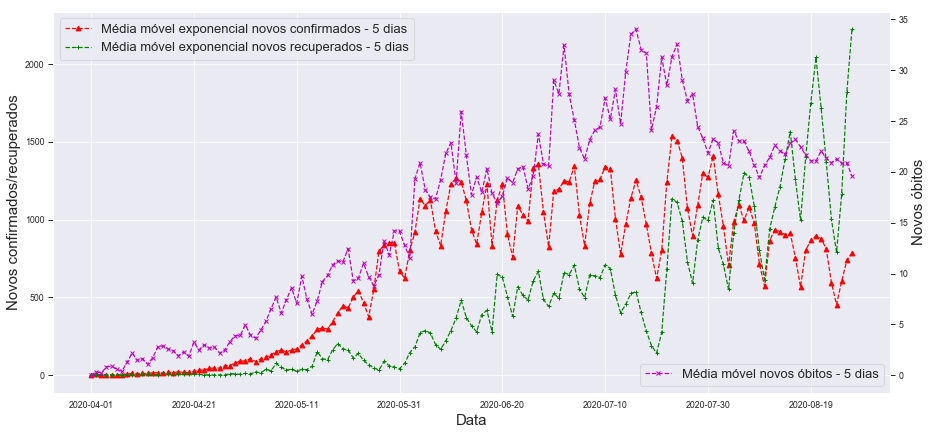

In [425]:
# Mapa confirmados e novos acumulados

fig, ax = plt.subplots()
ax.plot(media_movel['data'], media_movel['mm_7_novos_confirmados'], 'r--^', label = 'Média móvel exponencial novos confirmados - 5 dias')
ax.plot(media_movel['data'],media_movel['mm_7_novos_recuperados'], 'g--+', label = 'Média móvel exponencial novos recuperados - 5 dias') 
ax.set_xlabel('Data', fontsize = 15) # Nome do eixo x
ax.set_ylabel('Novos confirmados/recuperados', fontsize = 15) # Nome do eixo y
ax.xaxis.set_major_locator(plt.MaxNLocator(10)) # Define quantidad de label

ax1 = ax.twinx()

ax1.plot(media_movel['data'],media_movel['mm_7_novos_obitos'], 'm--x', label = 'Média móvel novos óbitos - 5 dias') 
ax1.xaxis.set_major_locator(plt.MaxNLocator(10)) # Define quantidad de label
ax1.set_ylabel('Novos óbitos', fontsize = 15) # Nome do eixo x
ax1.grid(False)

ax1.legend(loc = 'lower right')
ax.legend(loc = 'upper left')
plt.savefig('mm_7_novos_pb.png')

## Variação

In [426]:
media_movel_var = (pb
               >> mutate(mm_7_var_confirmados =  X.var_conf.rolling(window = 5).mean())
               >> mutate(mm_7_var_obitos = X.var_obi.rolling(window = 5).mean()) 
               >> mutate(mm_7_var_recuperados =  X.var_rec.rolling(window = 5).mean()) 
               >> drop(X.var_conf, X.var_obi, X.var_rec)) 
media_movel_var.tail()

,data,mm_7_var_confirmados,mm_7_var_obitos,mm_7_var_recuperados
23223,2020-08-23,0.735266,0.935600,2.448689
23447,2020-08-24,0.564564,0.944671,1.679549
23671,2020-08-25,0.550128,0.927411,1.380246
23895,2020-08-26,0.576842,0.892230,1.990722
24119,2020-08-27,0.612338,0.859263,2.661385


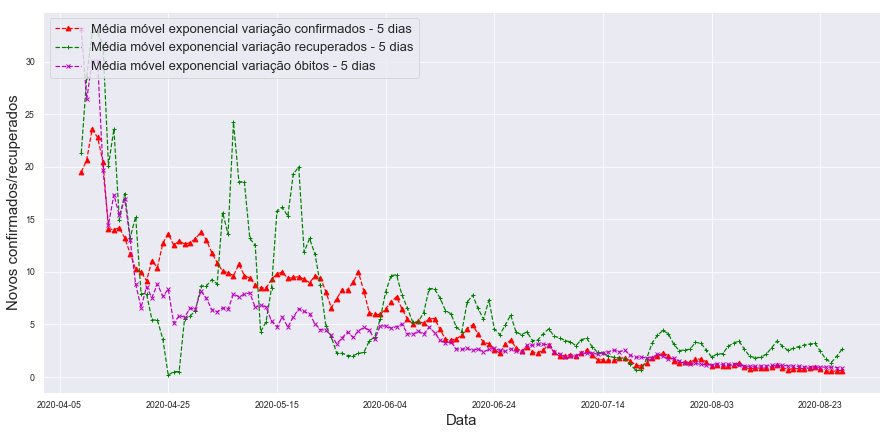

In [427]:
# Mapa confirmados e novos acumulados

fig, ax = plt.subplots()
ax.plot(media_movel_var['data'], media_movel_var.mm_7_var_confirmados, 'r--^', label = 'Média móvel exponencial variação confirmados - 5 dias')
ax.plot(media_movel_var['data'],media_movel_var.mm_7_var_recuperados, 'g--+', label = 'Média móvel exponencial variação recuperados - 5 dias') 
ax.plot(media_movel_var['data'],media_movel_var.mm_7_var_obitos, 'm--x', label = 'Média móvel exponencial variação óbitos - 5 dias') 
ax.set_xlabel('Data', fontsize = 15) # Nome do eixo x
ax.set_ylabel('Novos confirmados/recuperados', fontsize = 15) # Nome do eixo y
ax.xaxis.set_major_locator(plt.MaxNLocator(10)) # Define quantidad de label



ax.legend(loc = 'upper left')
plt.savefig('var_7_novos_pb.png')

# Casos Ativos

In [428]:
# Criando as variações
pb_a =(
        paraiba  >> mutate(ativos = (X.confirmados - X.recuperados - X.obitos))
        >> mutate(mm_ativos =  X.ativos.ewm(span=5, adjust=False).mean()) 
)

pb_a = pb_a.dropna(how = 'any') # Tira valores ausentes
pb_a.head()

,data,cidade,confirmados,obitos,recuperados,novos_casos,novos_obitos,novos_recuperados,ativos,mm_ativos
12,2020-04-01,Paraíba,20,1,0,3,0,0.0,19,19.000000
19,2020-04-02,Paraíba,28,1,0,8,1,0.0,27,21.666667
26,2020-04-03,Paraíba,30,1,0,2,0,0.0,29,24.111111
35,2020-04-04,Paraíba,34,3,9,4,2,9.0,22,23.407407
44,2020-04-05,Paraíba,35,4,9,1,1,0.0,22,22.938272


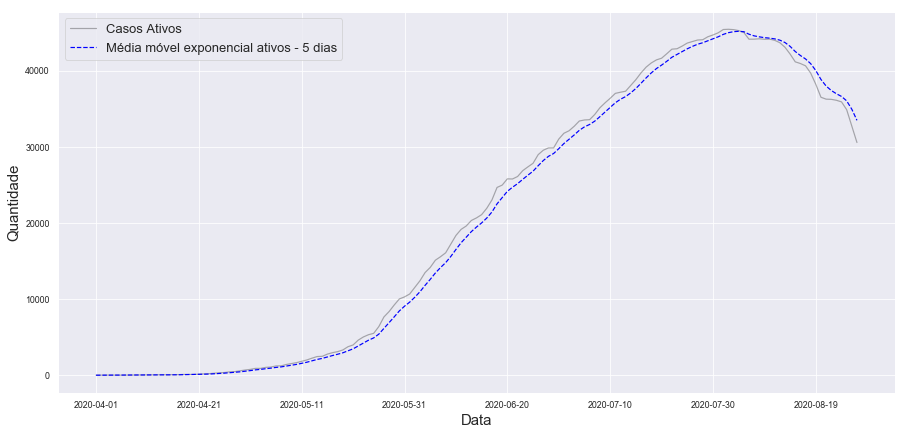

In [429]:
# Mapa confirmados e novos acumulados

fig, ax = plt.subplots()
ax.plot(pb_a.data, pb_a.ativos, 'k-', alpha = 0.3 , label = 'Casos Ativos')
ax.plot(pb_a.data,pb_a.mm_ativos, 'b--', label = 'Média móvel exponencial ativos - 5 dias') 
ax.set_xlabel('Data', fontsize = 15) # Nome do eixo x
ax.set_ylabel('Quantidade', fontsize = 15) # Nome do eixo y
ax.xaxis.set_major_locator(plt.MaxNLocator(10)) # Define quantidad de label



ax.legend(loc = 'upper left')
plt.savefig('ativos.png')

# João Pessoa e Paraiba

In [430]:
jp = df_teste >> mask(X.cidade == 'João Pessoa')
# Criando as variações
jp = ( jp >> mutate(mm_5 =  X.novos_casos.ewm(span=5, adjust=False).mean()) )
jp.head()

,data,cidade,confirmados,obitos,recuperados,novos_casos,novos_obitos,mm_5
0,2020-03-31,João Pessoa,12,0,0,0,0,0.000000
6,2020-04-01,João Pessoa,14,0,0,2,0,0.666667
13,2020-04-02,João Pessoa,22,0,0,8,0,3.111111
20,2020-04-03,João Pessoa,24,1,0,2,1,2.740741
27,2020-04-04,João Pessoa,26,1,0,2,0,2.493827


In [431]:
paraiba = ( paraiba >> mutate(mm_5 =  X.novos_casos.ewm(span=5, adjust=False).mean()) )
paraiba.head()

,data,cidade,confirmados,obitos,recuperados,novos_casos,novos_obitos,novos_recuperados,mm_5
12,2020-04-01,Paraíba,20,1,0,3,0,0.0,3.000000
19,2020-04-02,Paraíba,28,1,0,8,1,0.0,4.666667
26,2020-04-03,Paraíba,30,1,0,2,0,0.0,3.777778
35,2020-04-04,Paraíba,34,3,9,4,2,9.0,3.851852
44,2020-04-05,Paraíba,35,4,9,1,1,0.0,2.901235


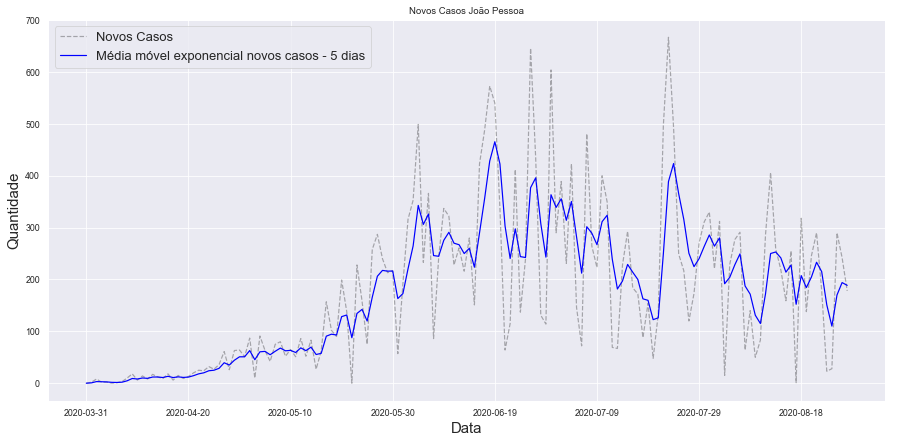

In [432]:
# Mapa confirmados e novos acumulados

fig, ax = plt.subplots()
ax.plot(jp.data, jp.novos_casos, 'k--', alpha = 0.3, label = 'Novos Casos')
ax.plot(jp.data,jp.mm_5, 'b-', label = 'Média móvel exponencial novos casos - 5 dias') 
ax.set_xlabel('Data', fontsize = 15) # Nome do eixo x
ax.set_ylabel('Quantidade', fontsize = 15) # Nome do eixo y
ax.xaxis.set_major_locator(plt.MaxNLocator(10)) # Define quantidad de label
ax.set_title('Novos Casos João Pessoa')


ax.legend(loc = 'upper left')
plt.savefig('jp_mm5.png')

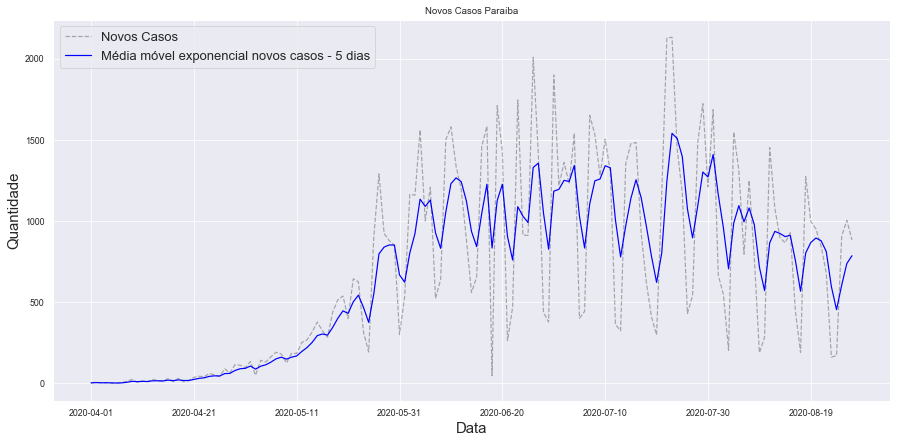

In [433]:
# Mapa confirmados e novos acumulados

fig, ax = plt.subplots()
ax.plot(paraiba.data, paraiba.novos_casos, 'k--', alpha = 0.3, label = 'Novos Casos')
ax.plot(paraiba.data,paraiba.mm_5, 'b-', label = 'Média móvel exponencial novos casos - 5 dias') 
ax.set_xlabel('Data', fontsize = 15) # Nome do eixo x
ax.set_ylabel('Quantidade', fontsize = 15) # Nome do eixo y
ax.xaxis.set_major_locator(plt.MaxNLocator(10)) # Define quantidad de label
ax.set_title('Novos Casos Paraíba')


ax.legend(loc = 'upper left')
plt.savefig('pb_mm5.png')

# João Pessoa em relação ao resto

In [434]:
resto = df_teste.loc[(df_teste['cidade'] != 'João Pessoa') & (df_teste['cidade'] != 'Paraíba')]

In [435]:
resto = resto.groupby('data').sum()
resto.head()

,confirmados,obitos,recuperados,novos_casos,novos_obitos
data,,,,,
2020-03-31,5,1,0,3,1
2020-04-01,6,1,0,1,0
2020-04-02,6,1,0,0,0
2020-04-03,6,1,0,0,0
2020-04-04,8,1,0,2,0


In [436]:
joao_pessoa = df_teste.loc[df_teste['cidade'] == 'João Pessoa']
jp_resto = pd.merge(resto, joao_pessoa, how = 'inner', on=['data'], suffixes=('_resto', '_jp'))
jp_resto = jp_resto[['data','confirmados_resto','confirmados_jp']]
jp_resto.columns = ['data','Outros Municípios', 'João Pessoa']
jp_resto.tail()

,data,Outros Municípios,João Pessoa
145,2020-08-23,75326,25791
146,2020-08-24,75473,25819
147,2020-08-25,76082,26109
148,2020-08-26,76856,26351
149,2020-08-27,77567,26529


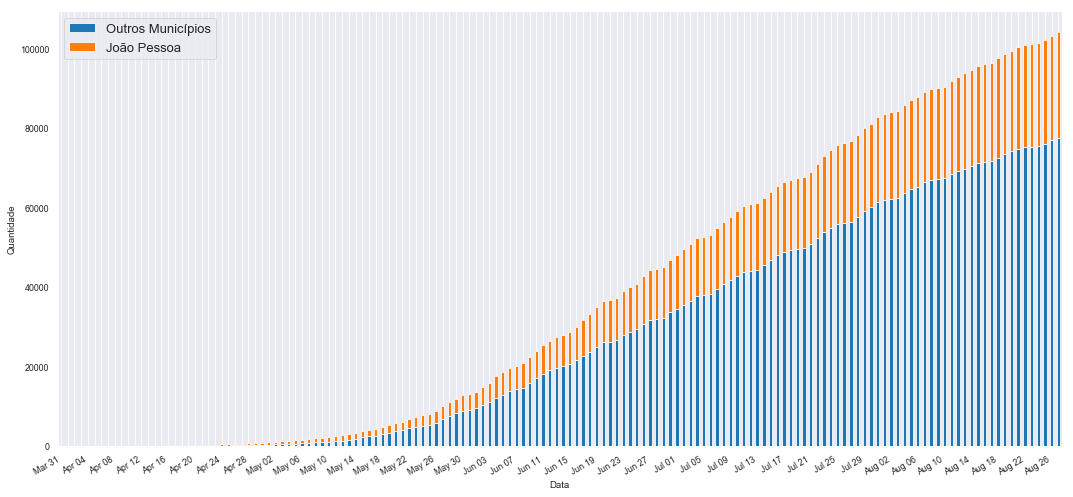

In [437]:
import matplotlib.dates as dates
from datetime import datetime
import matplotlib.ticker as ticker

jp_resto.index = jp_resto['data']

ax = jp_resto.plot(kind="bar", stacked=True)
plt.ylabel('Quantidade')
plt.xlabel('Data')
plt.xticks(rotation=60) # Gira as legendas do eixo X
plt.rcParams['figure.figsize'] = (10,5)
ax.xaxis.grid(True, which="minor")
ax.yaxis.grid()

ticklabels = ['']*len(jp_resto.index)
# Every 4th ticklable shows the month and day
ticklabels[::4] = [datetime.strptime(item, '%Y-%m-%d').strftime('%b %d') for item in jp_resto.index[::4]]
# Every 12th ticklabel includes the year
ticklabels[::12] = [datetime.strptime(item, '%Y-%m-%d').strftime('%b %d') for item in jp_resto.index[::12]]
ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
plt.gcf().autofmt_xdate()



plt.tight_layout()
plt.savefig('evolucao_part_jp.png')

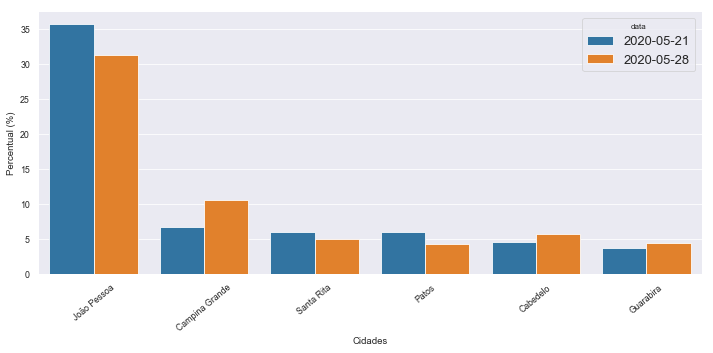

In [438]:
# Confirmados
df_muni = df_teste[['data','cidade', 'confirmados']]
df_muni = df_muni.loc[(df_muni['data'] == '2020-05-21') | (df_muni['data'] == '2020-05-28')]
df_muni = df_muni.loc[(df_muni['cidade'] == 'João Pessoa') |
                      (df_muni['cidade'] == 'Campina Grande') |
                      (df_muni['cidade'] == 'Santa Rita') |
                      (df_muni['cidade'] == 'Patos') |
                      (df_muni['cidade'] == 'Cabedelo') |
                      (df_muni['cidade'] == 'Guarabira') |
                      (df_muni['cidade'] == 'Paraíba')]


prop_inicial = df_muni.loc[(df_muni['data'] == '2020-05-21')]['confirmados']/int(df_muni.loc[(df_muni['data'] == '2020-05-21') & (df_muni['cidade'] == 'Paraíba'), 'confirmados']) 
prop_final = df_muni.loc[(df_muni['data'] == '2020-05-28')]['confirmados']/int(df_muni.loc[(df_muni['data'] == '2020-05-28') & (df_muni['cidade'] == 'Paraíba'), 'confirmados'])

prop_conf = list(prop_inicial*100) + list(prop_final*100)
df_muni['prop_conf'] = prop_conf

df_muni = df_muni.loc[df_muni['cidade'] != 'Paraíba']
import seaborn as sns

# A linha no meio mostra o desvio padrão, enquanto a barra mostra a média
fig = sns.barplot(x = 'cidade', y = 'prop_conf', hue = 'data',  data = df_muni)
fig.set(xlabel='Cidades', ylabel = 'Percentual (%)' )
fig = fig.get_figure()
plt.xticks(rotation=40)
plt.tight_layout() # Organiza o espaço
fig.savefig('participacao_cidades.png')

# Análise dos casos confirmados

In [439]:
from functools import reduce
# Novos Casos
df_muni = df_teste[['data','cidade','confirmados']]
df_muni.head()

,data,cidade,confirmados
0,2020-03-31,João Pessoa,12
1,2020-03-31,Campina Grande,2
2,2020-03-31,Sousa,1
3,2020-03-31,Igaracy,1
4,2020-03-31,Patos,1


In [440]:
joao_pessoa = df_muni.loc[(df_muni['cidade'] == 'João Pessoa')]
campina_grande = df_muni.loc[(df_muni['cidade'] == 'Campina Grande')]
santa_rita = df_muni.loc[(df_muni['cidade'] == 'Santa Rita')]
patos = df_muni.loc[(df_muni['cidade'] == 'Patos')]
cabedelo = df_muni.loc[(df_muni['cidade'] == 'Cabedelo')]
guarabira = df_muni.loc[(df_muni['cidade'] == 'Guarabira')]
pb = df_muni.loc[(df_muni['cidade'] == 'Paraíba')]

In [441]:
dfs = [joao_pessoa, campina_grande, santa_rita, patos, cabedelo,guarabira, pb]

muni_selecionados = reduce(lambda left,right: pd.merge(left,right, how='inner', on='data'), dfs)
muni_selecionados.columns = ['data','cidade','novos_casos_jp','cidade','novos_casos_cg','cidade','novos_casos_sr', 'cidade','novos_casos_pts',
                            'cidade','novos_casos_gua','cidade','novos_casos_cab', 'cidade','novos_casos_pb']
muni_selecionados = muni_selecionados[['data','novos_casos_jp','novos_casos_cg','novos_casos_sr', 'novos_casos_pts', 'novos_casos_cab',
                                       'novos_casos_gua','novos_casos_pb']]

muni_selecionados.tail()

,data,novos_casos_jp,novos_casos_cg,novos_casos_sr,novos_casos_pts,novos_casos_cab,novos_casos_gua,novos_casos_pb
122,2020-08-23,25791,12147,2906,3498,3928,2676,101132
123,2020-08-24,25819,12152,2915,3505,3929,2680,101303
124,2020-08-25,26109,12178,2960,3515,3945,2688,102208
125,2020-08-26,26351,12191,2978,3536,4015,2713,103213
126,2020-08-27,26529,12218,3008,3559,4044,2729,104096


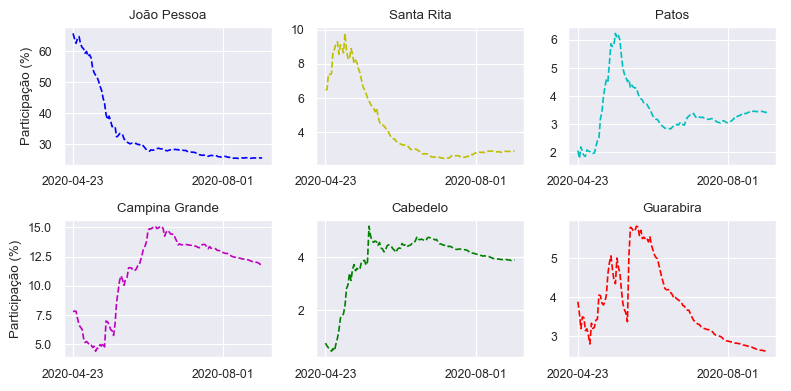

In [442]:
fig, ax = plt.subplots(figsize=(8,4), dpi = 100, nrows=2, ncols=3)

#João Pessoa
ax[0][0].set_title('João Pessoa')
ax[0][0].plot(muni_selecionados['data'], (muni_selecionados['novos_casos_jp']*100/muni_selecionados['novos_casos_pb']), 'b--')
ax[0][0].xaxis.set_major_locator(plt.MaxNLocator(1)) # Define quantidad de label
ax[0][0].set_ylabel('Participação (%)')

# Santa Rita
ax[0][1].set_title('Santa Rita')
ax[0][1].plot(muni_selecionados['data'], (muni_selecionados['novos_casos_sr']*100/muni_selecionados['novos_casos_pb']), 'y--')
ax[0][1].xaxis.set_major_locator(plt.MaxNLocator(1)) # Define quantidad de label

# Patos
ax[0][2].set_title('Patos')
ax[0][2].plot(muni_selecionados['data'], (muni_selecionados['novos_casos_pts']*100/muni_selecionados['novos_casos_pb']), 'c--')
ax[0][2].xaxis.set_major_locator(plt.MaxNLocator(1)) # Define quantidad de label


#Campina grande
ax[1][0].set_title('Campina Grande')
ax[1][0].plot(muni_selecionados['data'], (muni_selecionados['novos_casos_cg']*100/muni_selecionados['novos_casos_pb']), 'm--')
ax[1][0].xaxis.set_major_locator(plt.MaxNLocator(1)) # Define quantidad de label
ax[1][0].set_ylabel('Participação (%)')

# Cabedelo
ax[1][1].set_title('Cabedelo')
ax[1][1].plot(muni_selecionados['data'], (muni_selecionados['novos_casos_cab']*100/muni_selecionados['novos_casos_pb']), 'g--')
ax[1][1].xaxis.set_major_locator(plt.MaxNLocator(1)) # Define quantidad de label

# Guarabira
ax[1][2].set_title('Guarabira')
ax[1][2].plot(muni_selecionados['data'], (muni_selecionados['novos_casos_gua']*100/muni_selecionados['novos_casos_pb']), 'r--')
ax[1][2].xaxis.set_major_locator(plt.MaxNLocator(1)) # Define quantidad de label


plt.tight_layout() # Organiza o espaço
fig.savefig('prop_muni_jp.png')

# Análise Regiões Metropolitanas

## Zona metropolitana de João Pessoa

In [443]:
df_teste = df_teste[['data','cidade','confirmados']]
pb = df_teste.loc[(df_teste['cidade'] == 'Paraíba')]

In [444]:
jp = df_teste.loc[(df_teste['cidade'] == 'João Pessoa')]
conde = df_teste.loc[((df_teste['cidade'] == 'Conde') )]
bayeux = df_teste.loc[(df_teste['cidade'] == 'Bayeux')]
lucena = df_teste.loc[(df_teste['cidade'] == 'Lucena')]
sr = df_teste.loc[(df_teste['cidade'] == 'Santa Rita')]
alhandra = df_teste.loc[(df_teste['cidade'] == 'Alhandra')]
rio_tinto = df_teste.loc[(df_teste['cidade'] == 'Rio Tinto')]
cruz_es = df_teste.loc[(df_teste['cidade'] == 'Cruz do Espírito Santo')]
pedras_de_fogo = df_teste.loc[(df_teste['cidade'] == 'Pedras de Fogo')]
caapora = df_teste.loc[ (df_teste['cidade'] == 'Caaporã')]
pitimbu = df_teste.loc[(df_teste['cidade'] == 'Pitimbu')]
cabedelo = df_teste.loc[(df_teste['cidade'] == 'Cabedelo')]

In [445]:
dfs = [jp,conde,bayeux,lucena,sr,alhandra,rio_tinto,cruz_es,pedras_de_fogo,caapora,pitimbu, cabedelo, pb]

zm_jp = reduce(lambda left,right: pd.merge(left,right, how='inner', on='data'), dfs)

zm_jp.columns = ['data','cidade','c_jp','cidade','c_conde','cidade','c_b','cidade','c_lucena', 'cidade','c_sr',
                 'cidade','c_alhandra','cidade','c_rt', 'cidade','c_ces','cidade','c_pf','cidade','c_caa','cidade','c_pit', 'cidade','c_cabedelo', 'cidade','c_pb']

del zm_jp['cidade']

zm_jp.head()

,data,c_jp,c_conde,c_b,c_lucena,c_sr,c_alhandra,c_rt,c_ces,c_pf,c_caa,c_pit,c_cabedelo,c_pb
0,2020-05-01,614,16,39,4,96,4,4,3,6,3,1,29,1034
1,2020-05-02,701,17,41,5,100,7,4,4,9,3,1,39,1169
2,2020-05-03,711,17,43,5,111,7,4,4,9,3,2,39,1219
3,2020-05-04,802,17,44,5,122,8,4,6,10,4,2,44,1361
4,2020-05-05,865,18,45,6,129,8,5,7,15,5,2,51,1493


In [446]:
zm_jp['total_zona'] =  zm_jp.sum(axis=1) - zm_jp['c_pb']

In [447]:
zm_jp.head()

,data,c_jp,c_conde,c_b,c_lucena,c_sr,c_alhandra,c_rt,c_ces,c_pf,c_caa,c_pit,c_cabedelo,c_pb,total_zona
0,2020-05-01,614,16,39,4,96,4,4,3,6,3,1,29,1034,819
1,2020-05-02,701,17,41,5,100,7,4,4,9,3,1,39,1169,931
2,2020-05-03,711,17,43,5,111,7,4,4,9,3,2,39,1219,955
3,2020-05-04,802,17,44,5,122,8,4,6,10,4,2,44,1361,1068
4,2020-05-05,865,18,45,6,129,8,5,7,15,5,2,51,1493,1156


In [448]:
zm_jp['participacao'] = zm_jp['total_zona']*100/zm_jp['c_pb']
zm_jp.tail()

,data,c_jp,c_conde,c_b,c_lucena,c_sr,c_alhandra,c_rt,c_ces,c_pf,c_caa,c_pit,c_cabedelo,c_pb,total_zona,participacao
114,2020-08-23,25791,755,1726,423,2906,620,1085,286,1283,937,613,2676,101132,39101,38.663331
115,2020-08-24,25819,755,1727,427,2915,620,1089,286,1283,938,614,2680,101303,39153,38.649398
116,2020-08-25,26109,758,1728,432,2960,625,1091,286,1283,939,615,2688,102208,39514,38.660379
117,2020-08-26,26351,761,1731,439,2978,627,1099,286,1283,947,615,2713,103213,39830,38.590100
118,2020-08-27,26529,766,1740,443,3008,628,1102,286,1293,948,617,2729,104096,40089,38.511566


## Zona Metropolitana de Campina Grande

In [449]:
cg = df_teste.loc[(df_teste['cidade'] == 'Campina Grande')]
puxinana = df_teste.loc[((df_teste['cidade'] == 'Puxinanã') )]
lagoa_seca = df_teste.loc[(df_teste['cidade'] == 'Lagoa Seca')]
massaranduba = df_teste.loc[(df_teste['cidade'] == 'Massaranduba')]
serra_redonda = df_teste.loc[(df_teste['cidade'] == 'Serra Redonda')]
itatuba = df_teste.loc[(df_teste['cidade'] == 'Itatuba')]
queimadas = df_teste.loc[(df_teste['cidade'] == 'Queimadas')]
boqueirao = df_teste.loc[(df_teste['cidade'] == 'Boqueirão')]
barra_santana = df_teste.loc[(df_teste['cidade'] == 'Barra de Santana')]
gado_bravo = df_teste.loc[(df_teste['cidade'] == 'Gado Bravo')]
aroeiras = df_teste.loc[(df_teste['cidade'] == 'Aroeiras')]
umbuzeiro = df_teste.loc[(df_teste['cidade'] == 'Umbuzeiro')]


In [450]:
dfs = [cg, puxinana, lagoa_seca, massaranduba,serra_redonda,itatuba,queimadas, boqueirao,barra_santana,gado_bravo,aroeiras, umbuzeiro, pb]

zm_cg = reduce(lambda left,right: pd.merge(left,right, how='inner', on='data'), dfs)

zm_cg.columns = ['data','cidade','c_cg','cidade','c_pux','cidade','c_ls','cidade','c_massa', 'cidade','c_sr',
                 'cidade','c_ita','cidade','c_quei', 'cidade','c_boq','cidade','c_bs','cidade','c_gb','cidade','c_a', 'cidade','c_umbu', 'cidade','c_pb']

del zm_cg['cidade']

zm_cg.head()

,data,c_cg,c_pux,c_ls,c_massa,c_sr,c_ita,c_quei,c_boq,c_bs,c_gb,c_a,c_umbu,c_pb
0,2020-05-12,134,1,8,4,2,2,6,2,2,2,2,4,2777
1,2020-05-13,155,1,8,4,2,2,6,2,2,2,5,5,3045
2,2020-05-14,160,1,8,4,2,4,6,2,4,2,5,7,3361
3,2020-05-15,261,1,8,4,2,4,17,2,4,2,5,7,3739
4,2020-05-16,280,1,8,6,2,8,17,2,4,4,5,8,4063


In [451]:
zm_cg["total_zona"] = zm_cg.sum(axis=1) - zm_cg['c_pb']
zm_cg.head()

,data,c_cg,c_pux,c_ls,c_massa,c_sr,c_ita,c_quei,c_boq,c_bs,c_gb,c_a,c_umbu,c_pb,total_zona
0,2020-05-12,134,1,8,4,2,2,6,2,2,2,2,4,2777,169
1,2020-05-13,155,1,8,4,2,2,6,2,2,2,5,5,3045,194
2,2020-05-14,160,1,8,4,2,4,6,2,4,2,5,7,3361,205
3,2020-05-15,261,1,8,4,2,4,17,2,4,2,5,7,3739,317
4,2020-05-16,280,1,8,6,2,8,17,2,4,4,5,8,4063,345


In [452]:
zm_cg['participacao'] = zm_cg['total_zona']*100/zm_cg['c_pb']
zm_cg.tail()

,data,c_cg,c_pux,c_ls,c_massa,c_sr,c_ita,c_quei,c_boq,c_bs,c_gb,c_a,c_umbu,c_pb,total_zona,participacao
103,2020-08-23,12147,276,684,323,261,338,1142,371,104,97,209,77,101132,16029,15.849583
104,2020-08-24,12152,276,684,323,261,339,1142,371,104,97,209,77,101303,16035,15.828751
105,2020-08-25,12178,277,689,327,261,340,1157,371,105,97,209,78,102208,16089,15.741429
106,2020-08-26,12191,279,690,327,262,342,1184,372,105,100,209,78,103213,16139,15.636596
107,2020-08-27,12218,280,694,330,262,343,1189,375,105,100,211,78,104096,16185,15.548148


## Zona Metropolitana Patos

In [453]:
patos = df_teste.loc[(df_teste['cidade'] == 'Patos')]
santa_teresinha = df_teste.loc[(df_teste['cidade'] == 'Santa Teresinha')]
condado = df_teste.loc[(df_teste['cidade'] == 'Condado')]
malta = df_teste.loc[(df_teste['cidade'] == 'Malta')]
santa_luzia = df_teste.loc[(df_teste['cidade'] == 'Santa Luzia')]
sjs = df_teste.loc[(df_teste['cidade'] == 'São José do Sabugi')]
js = df_teste.loc[(df_teste['cidade'] == 'Junco do Seridó')]
teixeira = df_teste.loc[(df_teste['cidade'] == 'Teixeira')]
mat = df_teste.loc[(df_teste['cidade'] == 'Maturéia')]

In [454]:
dfs = [patos, santa_teresinha, condado, malta, santa_luzia, sjs, js, teixeira, mat, pb]

zm_pt = reduce(lambda left,right: pd.merge(left,right, how='inner', on='data'), dfs)


zm_pt.columns = ['data','cidade','c_pt','cidade','c_st','cidade','c_cond','cidade','c_malta', 'cidade','c_sl',
                 'cidade','c_sjs','cidade','c_js', 'cidade','c_tex','cidade','c_mat', 'cidade','c_pb']

del zm_pt['cidade']

zm_pt.tail()

,data,c_pt,c_st,c_cond,c_malta,c_sl,c_sjs,c_js,c_tex,c_mat,c_pb
104,2020-08-23,3498,54,125,108,251,236,60,166,48,101132
105,2020-08-24,3505,54,125,108,251,236,60,166,49,101303
106,2020-08-25,3515,55,128,108,252,240,60,167,49,102208
107,2020-08-26,3536,57,136,109,260,251,63,168,51,103213
108,2020-08-27,3559,57,138,109,262,251,63,170,55,104096


In [455]:
zm_pt["total_zona"] = zm_pt.sum(axis=1) - zm_pt['c_pb']
zm_pt.head()

,data,c_pt,c_st,c_cond,c_malta,c_sl,c_sjs,c_js,c_tex,c_mat,c_pb,total_zona
0,2020-05-11,109,1,11,1,1,2,3,1,1,2525,130
1,2020-05-12,128,1,14,1,1,2,3,1,1,2777,152
2,2020-05-13,138,1,14,2,4,2,3,1,1,3045,166
3,2020-05-14,174,1,14,2,4,2,3,1,1,3361,202
4,2020-05-15,219,1,20,4,4,2,3,1,1,3739,255


In [456]:
zm_pt['participacao'] = zm_pt['total_zona']*100/zm_pt['c_pb']
zm_pt.tail()

,data,c_pt,c_st,c_cond,c_malta,c_sl,c_sjs,c_js,c_tex,c_mat,c_pb,total_zona,participacao
104,2020-08-23,3498,54,125,108,251,236,60,166,48,101132,4546,4.495115
105,2020-08-24,3505,54,125,108,251,236,60,166,49,101303,4554,4.495425
106,2020-08-25,3515,55,128,108,252,240,60,167,49,102208,4574,4.475188
107,2020-08-26,3536,57,136,109,260,251,63,168,51,103213,4631,4.486838
108,2020-08-27,3559,57,138,109,262,251,63,170,55,104096,4664,4.480480


# Zona Metropolitana Guarabira

In [457]:
gua = df_teste.loc[(df_teste['cidade'] == 'Guarabira')]
alogoinha = df_teste.loc[(df_teste['cidade'] == 'Alagoinha')]
aracagi = df_teste.loc[(df_teste['cidade'] == 'Araçagi')]
arara =  df_teste.loc[(df_teste['cidade'] == 'Arara')] 
bananeiras = df_teste.loc[(df_teste['cidade'] == 'Bananeiras')]
belem = df_teste.loc[(df_teste['cidade'] == 'Belém')]
caicara = df_teste.loc[(df_teste['cidade'] == 'Caiçara')]
cuitegi = df_teste.loc[(df_teste['cidade'] == 'Cuitegi')]
duas_estradas = df_teste.loc[(df_teste['cidade'] == 'Duas Estradas')]
l_dentro = df_teste.loc[(df_teste['cidade'] == 'Lagoa de Dentro')]
mulun = df_teste.loc[(df_teste['cidade'] == 'Mulungu')]
piloes = df_teste.loc[(df_teste['cidade'] == 'Pilões')]
piloezinhos = df_teste.loc[(df_teste['cidade'] == 'Pilõezinhos')]
pirpiri = df_teste.loc[(df_teste['cidade'] == 'Pirpirituba')]
s_raiz = df_teste.loc[(df_teste['cidade'] == 'Serra da Raiz')]
sertaozinho = df_teste.loc[(df_teste['cidade'] == 'Sertãozinho')]
solanea = df_teste.loc[(df_teste['cidade'] == 'Solânea')]
serraria = df_teste.loc[(df_teste['cidade'] == 'Serraria')]

In [458]:
dfs = [gua, alogoinha, aracagi, arara, bananeiras, belem, caicara, duas_estradas, l_dentro, mulun, piloes, piloezinhos, pirpiri, s_raiz, sertaozinho , solanea, serraria, pb]

zm_gua = reduce(lambda left,right: pd.merge(left,right, how='inner', on='data'), dfs)


zm_gua.columns = ['data','cidade','c_gua','cidade','c_alagoinha','cidade','c_aracagi','cidade','c_arara', 'cidade','c_banan',
                 'cidade','c_belem','cidade','c_caicara', 'cidade','c_duas_estra','cidade','c_ldentro', 'cidade','c_mulun', 
                 'cidade','c_piloes', 'cidade','c_piloezin', 'cidade','c_pirp', 'cidade','c_sraiz', 'cidade','c_sertaozin', 
                 'cidade','c_solanea', 'cidade','c_serraria', 'cidade','c_pb']

del zm_gua['cidade']

zm_gua.head()

,data,c_gua,c_alagoinha,c_aracagi,c_arara,c_banan,c_belem,c_caicara,c_duas_estra,c_ldentro,c_mulun,c_piloes,c_piloezin,c_pirp,c_sraiz,c_sertaozin,c_solanea,c_serraria,c_pb
0,2020-05-15,131,14,6,1,8,7,8,1,2,3,1,9,6,4,2,8,1,3739
1,2020-05-16,145,14,13,1,8,7,10,1,2,3,1,9,7,5,2,10,1,4063
2,2020-05-17,166,14,13,1,8,7,10,1,2,6,1,9,7,5,2,10,1,4347
3,2020-05-18,184,16,24,2,9,8,10,1,2,6,5,9,7,5,3,10,1,4786
4,2020-05-19,205,29,24,2,11,8,12,4,4,6,5,15,7,5,6,12,1,5300


In [459]:
zm_gua["total_zona"] = zm_gua.sum(axis=1) - zm_gua['c_pb']
zm_gua.head()

,data,c_gua,c_alagoinha,c_aracagi,c_arara,c_banan,c_belem,c_caicara,c_duas_estra,c_ldentro,c_mulun,c_piloes,c_piloezin,c_pirp,c_sraiz,c_sertaozin,c_solanea,c_serraria,c_pb,total_zona
0,2020-05-15,131,14,6,1,8,7,8,1,2,3,1,9,6,4,2,8,1,3739,212
1,2020-05-16,145,14,13,1,8,7,10,1,2,3,1,9,7,5,2,10,1,4063,239
2,2020-05-17,166,14,13,1,8,7,10,1,2,6,1,9,7,5,2,10,1,4347,263
3,2020-05-18,184,16,24,2,9,8,10,1,2,6,5,9,7,5,3,10,1,4786,302
4,2020-05-19,205,29,24,2,11,8,12,4,4,6,5,15,7,5,6,12,1,5300,356


In [460]:
zm_gua['participacao'] = zm_gua['total_zona']*100/zm_gua['c_pb']
zm_gua.tail()

,data,c_gua,c_alagoinha,c_aracagi,c_arara,c_banan,c_belem,c_caicara,c_duas_estra,c_ldentro,...,c_piloes,c_piloezin,c_pirp,c_sraiz,c_sertaozin,c_solanea,c_serraria,c_pb,total_zona,participacao
100,2020-08-23,3928,932,495,203,285,1001,434,84,134,...,108,266,310,27,283,597,170,101132,9632,9.524186
101,2020-08-24,3929,933,495,203,293,1001,435,84,134,...,108,276,310,30,283,597,170,101303,9657,9.532788
102,2020-08-25,3945,945,495,205,305,1009,435,84,134,...,108,285,310,30,283,598,170,102208,9717,9.507084
103,2020-08-26,4015,945,498,215,317,1017,437,84,136,...,108,293,311,32,297,632,170,103213,9889,9.581157
104,2020-08-27,4044,949,498,217,326,1021,441,84,137,...,108,295,312,35,297,646,170,104096,9973,9.580579


## Juntando Base de Dados

In [461]:
zm_jp = zm_jp[['data','participacao']]
zm_cg = zm_cg[['data','participacao']]
zm_pt = zm_pt[['data','participacao']]
zm_gua = zm_gua[['data','participacao']]

In [462]:
dfs = [zm_jp,zm_cg,zm_pt, zm_gua]

zonas = reduce(lambda left,right: pd.merge(left,right, how='inner', on='data'), dfs)

zonas.columns = ['data','part_jp','part_cg','part_pt', 'part_gua']

zonas.tail()

,data,part_jp,part_cg,part_pt,part_gua
100,2020-08-23,38.663331,15.849583,4.495115,9.524186
101,2020-08-24,38.649398,15.828751,4.495425,9.532788
102,2020-08-25,38.660379,15.741429,4.475188,9.507084
103,2020-08-26,38.590100,15.636596,4.486838,9.581157
104,2020-08-27,38.511566,15.548148,4.480480,9.580579


In [463]:
zm_jp.tail(10)

,data,participacao
109,2020-08-18,38.832990
110,2020-08-19,38.678498
111,2020-08-20,38.662577
112,2020-08-21,38.734669
113,2020-08-22,38.687729
114,2020-08-23,38.663331
115,2020-08-24,38.649398
116,2020-08-25,38.660379
117,2020-08-26,38.590100
118,2020-08-27,38.511566


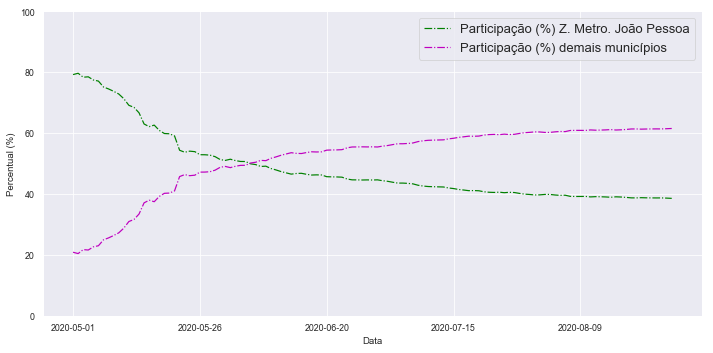

In [464]:
# Mapa confirmados e novos casos
data = mdates.num2date(mdates.datestr2num(paraiba['data']))
fig, ax = plt.subplots()
ax.plot(zm_jp['data'], zm_jp['participacao'], 'g-.', label = 'Participação (%) Z. Metro. João Pessoa')
ax.plot(zm_jp['data'], 100 - zm_jp['participacao'], 'm-.', label = 'Participação (%) demais municípios') 
ax.set_xlabel('Data') # Nome do eixo x
ax.set_ylabel('Percentual (%)') # Nome do eixo y
ax.xaxis.set_major_locator(plt.MaxNLocator(6)) # Define quantidad de label
plt.ylim(0,100)
plt.tight_layout() # Organiza o espaço
plt.rcParams['figure.figsize'] = (10,5)
ax.legend(loc = 'best')
plt.savefig('jp_resto.png')

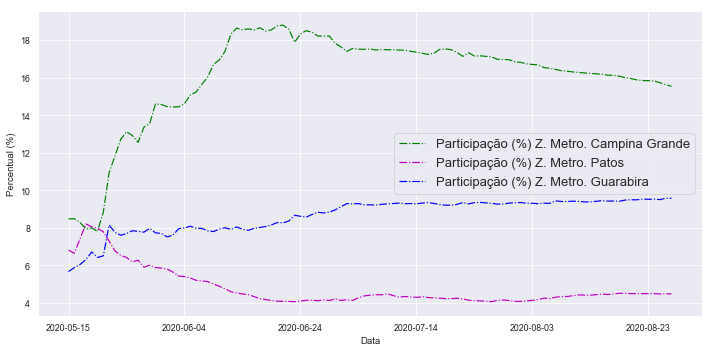

In [465]:
# Mapa confirmados e novos casos
data = mdates.num2date(mdates.datestr2num(paraiba['data']))
fig, ax = plt.subplots()
ax.plot(zonas['data'], zonas['part_cg'], 'g-.', label = 'Participação (%) Z. Metro. Campina Grande')
ax.plot(zonas['data'], zonas['part_pt'], 'm-.', label = 'Participação (%) Z. Metro. Patos') 
ax.plot(zonas['data'], zonas['part_gua'], 'b-.', label = 'Participação (%) Z. Metro. Guarabira') 
ax.set_xlabel('Data') # Nome do eixo x
ax.set_ylabel('Percentual (%)') # Nome do eixo y
ax.xaxis.set_major_locator(plt.MaxNLocator(6)) # Define quantidad de label
plt.tight_layout() # Organiza o espaço
plt.rcParams['figure.figsize'] = (10,5)
ax.legend(loc = 'best')
plt.savefig('cg_pt.png')